# Principal Component Analysis
PCAでHiggsChallengeデータセットの入力変数の相関をなくしてみます。

In [1]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

In [3]:
X = df[[
    # 'DER_mass_MMC',
    # 'DER_mass_transverse_met_lep',
    'DER_mass_vis',
    'DER_pt_h',
    # 'DER_deltaeta_jet_jet',
    # 'DER_mass_jet_jet',
    # 'DER_prodeta_jet_jet',
    'DER_deltar_tau_lep',
    'DER_pt_tot',
    'DER_sum_pt',
    'DER_pt_ratio_lep_tau',
    # 'DER_met_phi_centrality',
    # 'DER_lep_eta_centrality',
    # 'PRI_tau_pt',
    # 'PRI_tau_eta',
    # 'PRI_tau_phi',
    # 'PRI_lep_pt',
    # 'PRI_lep_eta',
    # 'PRI_lep_phi',
    # 'PRI_met',
    # 'PRI_met_phi',
    # 'PRI_met_sumet',
    # 'PRI_jet_num',
    # 'PRI_jet_leading_pt',
    # 'PRI_jet_leading_eta',
    # 'PRI_jet_leading_phi',
    # 'PRI_jet_subleading_pt',
    # 'PRI_jet_subleading_eta',
    # 'PRI_jet_subleading_phi',
    # 'PRI_jet_all_pt'
]]
Y = df['Label']
W = df['KaggleWeight']

from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)

X = X[df['KaggleSet'] == 't']
Y = Y[df['KaggleSet'] == 't']
W = W[df['KaggleSet'] == 't']

# # 1000イベントだけ見ることにします。
# X = X[:1000]
# Y = Y[:1000]

オリジナルデータの相関をプロットします。

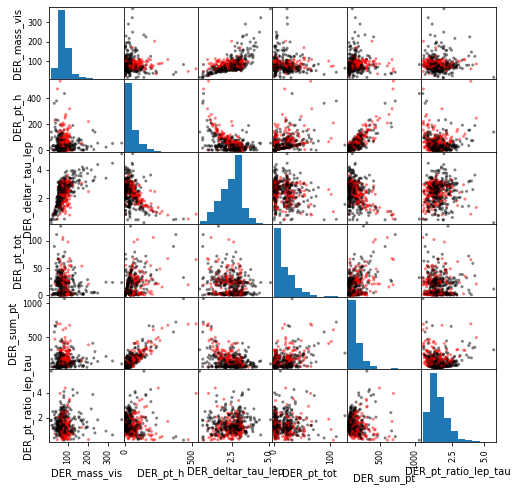

In [4]:
pd.plotting.scatter_matrix(X[:500], figsize=(8, 8), c=np.where(Y[:500], 'red', 'black'), alpha=0.5, diagonal='hist')
plt.show()

In [5]:
# 平均
print('Average:')
print(X.mean())
print()
# 標準偏差
print('Standard deviation:')
print(X.std())
print()

# 相関係数
print('Correlation coefficient:')
X.corr()

Average:
DER_mass_vis             81.181982
DER_pt_h                 57.895962
DER_deltar_tau_lep        2.373100
DER_pt_tot               18.917332
DER_sum_pt              158.432217
DER_pt_ratio_lep_tau      1.437609
dtype: float64

Standard deviation:
DER_mass_vis             40.828691
DER_pt_h                 63.655682
DER_deltar_tau_lep        0.782911
DER_pt_tot               22.273494
DER_sum_pt              115.706115
DER_pt_ratio_lep_tau      0.844743
dtype: float64

Correlation coefficient:


,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau
DER_mass_vis,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490
DER_pt_h,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187
DER_deltar_tau_lep,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046
DER_pt_tot,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193
DER_sum_pt,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791
DER_pt_ratio_lep_tau,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000


各変数をノーマライズします。ここでは平均が0、分散が1になるようにスケーリングします。

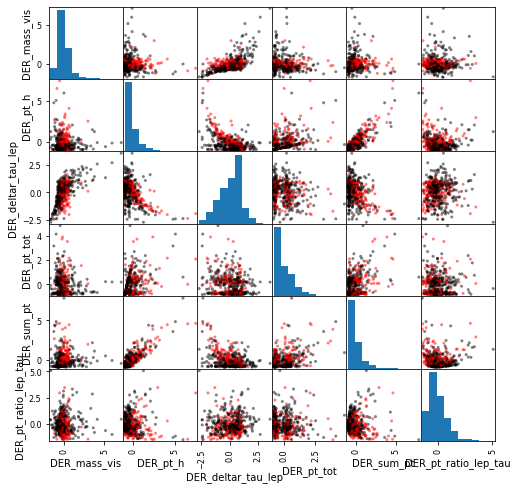

In [6]:
from sklearn.preprocessing import StandardScaler
X1 = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

pd.plotting.scatter_matrix(X1[:500], figsize=(8, 8), c=np.where(Y[:500], 'red', 'black'), alpha=0.5, diagonal='hist')
plt.show()

In [7]:
# 平均
print('Average:')
print(X1.mean())
print()
# 標準偏差
print('Standard deviation:')
print(X1.std())
print()

# 相関係数
print('Correlation coefficient:')
X1.corr()

Average:
DER_mass_vis           -3.436185e-17
DER_pt_h                4.411049e-17
DER_deltar_tau_lep     -5.145466e-16
DER_pt_tot             -4.546337e-16
DER_sum_pt             -1.032276e-16
DER_pt_ratio_lep_tau    3.732623e-16
dtype: float64

Standard deviation:
DER_mass_vis            1.000002
DER_pt_h                1.000002
DER_deltar_tau_lep      1.000002
DER_pt_tot              1.000002
DER_sum_pt              1.000002
DER_pt_ratio_lep_tau    1.000002
dtype: float64

Correlation coefficient:


,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau
DER_mass_vis,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490
DER_pt_h,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187
DER_deltar_tau_lep,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046
DER_pt_tot,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193
DER_sum_pt,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791
DER_pt_ratio_lep_tau,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000


PCAを適用します。

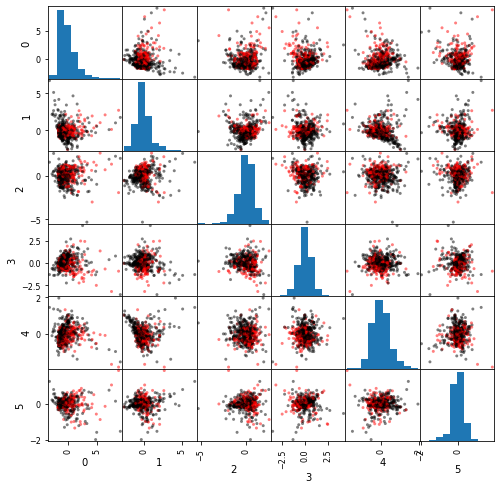

In [8]:
from sklearn.decomposition import PCA
X2 = pd.DataFrame(PCA().fit_transform(X1))

pd.plotting.scatter_matrix(X2[:500], figsize=(8, 8), c=np.where(Y[:500], 'red', 'black'), alpha=0.5, diagonal='hist')
plt.show()

In [9]:
# 平均
print('Average:')
print(X2.mean())
print()
# 標準偏差
print('Standard deviation:')
print(X2.std())
print()

# 相関係数
print('Correlation coefficient:')
X2.corr()

Average:
0    1.165290e-17
1   -1.227818e-17
2   -4.476419e-18
3   -8.526513e-18
4   -6.764367e-18
5    1.750067e-17
dtype: float64

Standard deviation:
0    1.565146
1    1.194936
2    0.972514
3    0.886396
4    0.490778
5    0.387461
dtype: float64

Correlation coefficient:


,0,1,2,3,4,5
0,1.000000e+00,-2.598892e-17,-2.036704e-17,-1.791864e-17,2.944555e-16,2.933297e-17
1,-2.598892e-17,1.000000e+00,3.082750e-16,-5.454113e-16,1.316866e-18,4.177527e-16
2,-2.036704e-17,3.082750e-16,1.000000e+00,3.532867e-16,6.973568e-17,1.858817e-16
3,-1.791864e-17,-5.454113e-16,3.532867e-16,1.000000e+00,-5.802218e-19,1.420017e-16
4,2.944555e-16,1.316866e-18,6.973568e-17,-5.802218e-19,1.000000e+00,-5.607415e-17
5,2.933297e-17,4.177527e-16,1.858817e-16,1.420017e-16,-5.607415e-17,1.000000e+00


## 手書き文字(MNIST)を使ったPCA

In [10]:
# MNIST データセットのインポート
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# # 3だけを1000イベント使用
images = train_images[train_labels == 3][:1000]

### 画像の表示

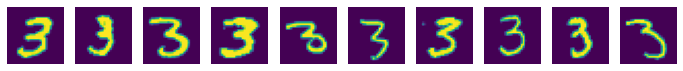

In [11]:
fig = plt.figure(figsize=(12, 20))

for j in range(10):
    ax = fig.add_subplot(1, 10, 1 + j)
    ax.imshow(images[j])
    ax.axis('off')


### PCAの適用

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
_ = pca.fit(images.reshape([-1, 28 * 28]))


#### 各主成分の表示

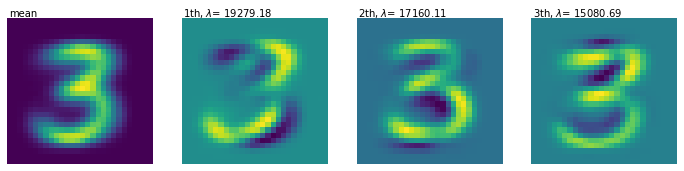

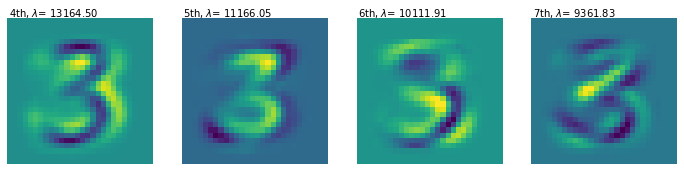

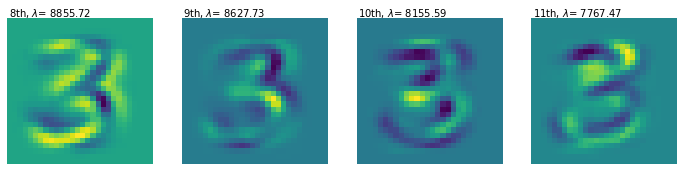

In [13]:
for j in range(12):
    if j % 4 == 0:
        fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 4, 1 + j % 4)
    if j == 0:
        ax.imshow(pca.mean_.reshape([28, 28]))
        ax.text(0.01, 1.01, 'mean', transform=ax.transAxes)
    else:
        ax.imshow(pca.components_[j-1].reshape([28, 28]))
        ax.text(0.01, 1.01, f'{j}th, ' + r'$\lambda$=' + f'{pca.singular_values_[j-1]: 2.2f}', transform=ax.transAxes)
    ax.axis('off')

#### 低次元要素を使ったときの画像再構成

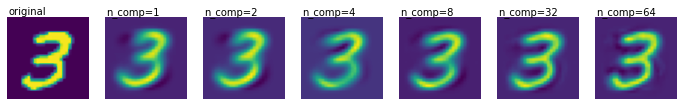

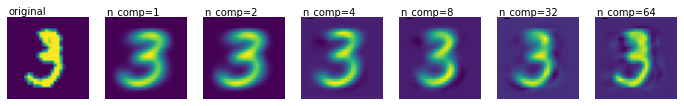

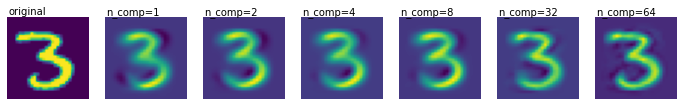

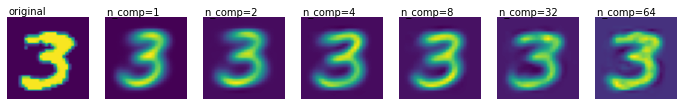

In [14]:
z = pca.transform(images.reshape([-1, 28 * 28]))
num_components = [1, 2, 4, 8, 32, 64]

for j in range(4):
    fig = plt.figure(figsize=(12, 12))
    zj = z[j]

    ax = fig.add_subplot(1, len(num_components) + 1, 1)
    ax.imshow(images[j])
    ax.text(0.01, 1.03, 'original', transform=ax.transAxes)
    ax.axis('off')

    for i, n_comp in enumerate(reversed(num_components)):
        zj[n_comp:] = 0
        ax = fig.add_subplot(1, len(num_components) + 1, 1 + len(num_components) - i)
        ax.imshow(pca.inverse_transform(zj).reshape([28, 28]))
        ax.text(0.01, 1.03, f'n_comp={n_comp}', transform=ax.transAxes)
        ax.axis('off')



# 多次元データの低次元空間へのマッピング

### Higgs Challenge datasetの2次元空間へのマッピング

/Users/saito_m/tool/env_ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saito_m/tool/env_ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


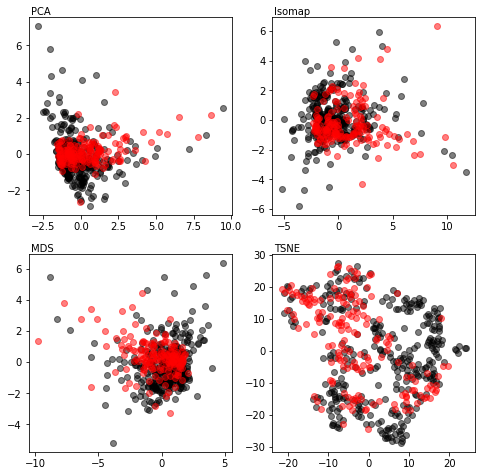

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(8, 8))
for i, module in enumerate([PCA, Isomap, MDS, TSNE]):
    ax = fig.add_subplot(2, 2, 1 + i)
    feature = module(n_components=2).fit_transform(X1[:500])
    bg = Y[:500] == 0
    sig = Y[:500] == 1
    ax.scatter(feature[bg, 0], feature[bg, 1], c="black", alpha=0.5, label="background")
    ax.scatter(feature[sig, 0], feature[sig, 1], c="red", alpha=0.5, label="signal")
    ax.text(0.01, 1.01, module.__name__, transform=ax.transAxes)


### 手書き文字(MNIST)の2次元へのマッピング

In [16]:
# MNIST データセットのインポート
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 0,1,4,6,7,8の文字を、1000画像だけを使用
labels_used = [0, 1, 4, 6, 7, 8]
images = train_images[np.isin(train_labels, labels_used)][:1000]
labels = train_labels[np.isin(train_labels, labels_used)][:1000]

/Users/saito_m/tool/env_ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saito_m/tool/env_ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


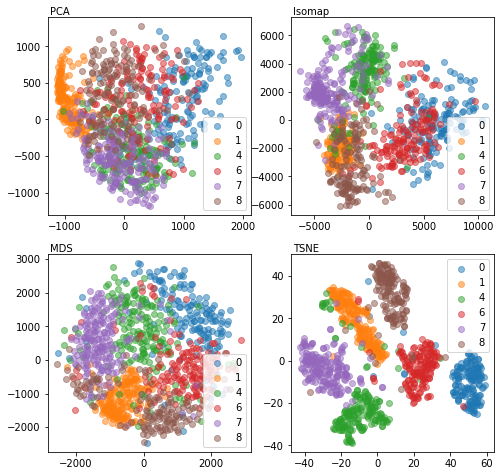

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(8, 8))
for i, module in enumerate([PCA, Isomap, MDS, TSNE]):
    ax = fig.add_subplot(2, 2, 1 + i)
    feature = module(n_components=2).fit_transform(images.reshape([-1, 28 * 28]))
    for j in labels_used:
        ax.scatter(feature[labels == j, 0], feature[labels == j, 1], alpha=0.5, label=j)
    ax.text(0.01, 1.01, module.__name__, transform=ax.transAxes)
    ax.legend()
